# Global Health Statistics - Kaggle

### À propos du Dataset
Cet ensemble de données fournit des statistiques complètes sur la santé mondiale, en se concentrant sur diverses maladies, traitements et résultats. Les données couvrent plusieurs pays et années, offrant des informations précieuses pour la recherche en santé, les études épidémiologiques et les applications d'apprentissage automatique. L'ensemble de données comprend des informations sur la prévalence, l'incidence et les taux de mortalité des maladies majeures, ainsi que sur l'efficacité des traitements et de l'infrastructure de soins de santé.

## Descriptions des colonnes
Country : Le nom du pays où les données de santé ont été enregistrées.

Year : L'année au cours de laquelle les données ont été collectées.

Disease name : Le nom de la maladie ou de l'état de santé suivi.

Disease Category : La catégorie de la maladie (par exemple, infectieuse, non transmissible).

Prevalence Rate (%) : Le pourcentage de la population touchée par la maladie.

Incidence Rate (%) : Le pourcentage de cas nouveaux ou de cas nouvellement diagnostiqués.

Mortality Rate (%) : Le pourcentage de la population touchée qui meurt de la maladie.

Age Group : La tranche d'âge la plus touchée par la maladie.

Gender : Le(s) sexe(s) affecté(s) par la maladie (Homme, Femme, les deux).

Population Affected : Le nombre total d'individus touchés par la maladie.

Healthcare Access (%) : Le pourcentage de la population ayant accès aux soins de santé.

Doctors per 1000 : Le nombre de médecins pour 1000 personnes.

Hospital Beds per 1000 : Le nombre de lits d'hôpitaux disponibles pour 1000 personnes.

Treatment Type : La principale méthode de traitement de la maladie (par exemple, les médicaments, la chirurgie).

Average Treatment Cost (USD) : Le coût moyen du traitement de la maladie en USD.

Availability of Vaccines/Treatment : Si des vaccins ou des traitements sont disponibles.

Recovery Rate (%) : Le pourcentage de personnes qui se remettent de la maladie.

DALYs : Années de vie ajustées au handicap, une mesure du fardeau de la maladie.

Improvement in 5 Years (%) : L'amélioration des résultats de la maladie au cours des cinq dernières années.

Per Capita Income (USD) : Le revenu moyen par personne dans le pays.

Education Index : Le niveau moyen d'éducation dans le pays.

Urbanization Rate (%) : Le pourcentage de la population vivant dans les zones urbaines.

In [1]:
import pandas as pd
import streamlit as st

df = pd.read_csv("data/healthstatistics.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   Country                             1000000 non-null  object 
 1   Year                                1000000 non-null  int64  
 2   Disease Name                        1000000 non-null  object 
 3   Disease Category                    1000000 non-null  object 
 4   Prevalence Rate (%)                 1000000 non-null  float64
 5   Incidence Rate (%)                  1000000 non-null  float64
 6   Mortality Rate (%)                  1000000 non-null  float64
 7   Age Group                           1000000 non-null  object 
 8   Gender                              1000000 non-null  object 
 9   Population Affected                 1000000 non-null  int64  
 10  Healthcare Access (%)               1000000 non-null  float64
 11  Doctors per 

In [2]:
cat_cols = [
    "Country",
    "Disease Name",
    "Disease Category",
    "Age Group",
    "Gender",
    "Treatment Type",
    "Availability of Vaccines/Treatment"
]

for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.title()
    df[col] = df[col].astype("category")
 #### Mettre les collonnes catégorielles en category pour optimiser la place

In [4]:
print("Plage temporelle :", df["Year"].min(), "→", df["Year"].max())


Plage temporelle : 2000 → 2024


In [6]:
df.duplicated().sum()

np.int64(0)

In [3]:
df.isna().sum() ### le Dataset est propre, aucune erreur

Country                               0
Year                                  0
Disease Name                          0
Disease Category                      0
Prevalence Rate (%)                   0
Incidence Rate (%)                    0
Mortality Rate (%)                    0
Age Group                             0
Gender                                0
Population Affected                   0
Healthcare Access (%)                 0
Doctors per 1000                      0
Hospital Beds per 1000                0
Treatment Type                        0
Average Treatment Cost (USD)          0
Availability of Vaccines/Treatment    0
Recovery Rate (%)                     0
DALYs                                 0
Improvement in 5 Years (%)            0
Per Capita Income (USD)               0
Education Index                       0
Urbanization Rate (%)                 0
dtype: int64

In [ ]:
df.groupby("Country")["Mortality Rate (%)"].describe()

/var/folders/zq/x8yfx5gd4l33_xvj8sth_pzw0000gn/T/ipykernel_63312/711869850.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Country")["Mortality Rate (%)"].describe()


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Argentina,49798.0,5.043000,2.864172,0.1,2.56,5.03,7.530,10.0
Australia,49953.0,5.053100,2.860372,0.1,2.58,5.05,7.530,10.0
Brazil,49687.0,5.062834,2.863032,0.1,2.58,5.08,7.550,10.0
Canada,50114.0,5.039311,2.857012,0.1,2.57,5.02,7.530,10.0
China,50066.0,5.052353,2.851567,0.1,2.58,5.05,7.510,10.0
France,49943.0,5.071906,2.856287,0.1,2.60,5.09,7.545,10.0
Germany,50176.0,5.062364,2.855536,0.1,2.60,5.07,7.540,10.0
India,49760.0,5.048486,2.849508,0.1,2.58,5.06,7.500,10.0
Indonesia,49756.0,5.050057,2.864195,0.1,2.59,5.02,7.530,10.0


In [ ]:
df.groupby("Disease Name")["Recovery Rate (%)"].mean()

/var/folders/zq/x8yfx5gd4l33_xvj8sth_pzw0000gn/T/ipykernel_63312/4033117302.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Disease Name")["Recovery Rate (%)"].mean()


Disease Name
Alzheimer'S Disease    74.538244
Asthma                 74.452923
Cancer                 74.446244
Cholera                74.562658
Covid-19               74.478060
Dengue                 74.487542
Diabetes               74.517525
Ebola                  74.463872
Hepatitis              74.575893
Hiv/Aids               74.503783
Hypertension           74.566580
Influenza              74.480686
Leprosy                74.502096
Malaria                74.433181
Measles                74.525884
Parkinson'S Disease    74.510787
Polio                  74.406516
Rabies                 74.465487
Tuberculosis           74.496974
Zika                   74.524676
Name: Recovery Rate (%), dtype: float64

In [ ]:
df.groupby(["Country","Disease Name"]).size().reset_index(name="Count")

/var/folders/zq/x8yfx5gd4l33_xvj8sth_pzw0000gn/T/ipykernel_63312/3700878643.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Country","Disease Name"]).size().reset_index(name="Count")


,Country,Disease Name,Count
0,Argentina,Alzheimer'S Disease,2453
1,Argentina,Asthma,2550
2,Argentina,Cancer,2455
3,Argentina,Cholera,2462
4,Argentina,Covid-19,2600
...,...,...,...
395,Usa,Parkinson'S Disease,2478
396,Usa,Polio,2555
397,Usa,Rabies,2480
398,Usa,Tuberculosis,2470


In [ ]:
(
    df.groupby(["Country", "Disease Name"])
      .size()
      .reset_index(name="Count")
      .sort_values(["Country", "Count"], ascending=[True, False,])
      .groupby("Country")
      .head(5)
)


/var/folders/zq/x8yfx5gd4l33_xvj8sth_pzw0000gn/T/ipykernel_63312/2645509868.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Country", "Disease Name"])
/var/folders/zq/x8yfx5gd4l33_xvj8sth_pzw0000gn/T/ipykernel_63312/2645509868.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("Country")


,Country,Disease Name,Count
4,Argentina,Covid-19,2600
11,Argentina,Influenza,2576
1,Argentina,Asthma,2550
18,Argentina,Tuberculosis,2543
14,Argentina,Measles,2535
...,...,...,...
392,Usa,Leprosy,2587
393,Usa,Malaria,2563
396,Usa,Polio,2555
388,Usa,Hepatitis,2525


In [ ]:
print("STATISTIQUES DES VARIABLES NUMÉRIQUES :")
df.describe().T

STATISTIQUES DES VARIABLES NUMÉRIQUES :


,count,mean,std,min,25%,50%,75%,max
Year,1000000.0,2011.996999,7.217287,2000.0,2006.00,2012.00,2018.00,2024.0
Prevalence Rate (%),1000000.0,10.047992,5.740189,0.1,5.09,10.04,15.01,20.0
Incidence Rate (%),1000000.0,7.555005,4.298947,0.1,3.84,7.55,11.28,15.0
Mortality Rate (%),1000000.0,5.049919,2.859427,0.1,2.58,5.05,7.53,10.0
Population Affected,1000000.0,500735.427363,288660.116648,1000.0,250491.25,501041.00,750782.00,1000000.0
Healthcare Access (%),1000000.0,74.987835,14.436345,50.0,62.47,75.00,87.49,100.0
Doctors per 1000,1000000.0,2.747929,1.299067,0.5,1.62,2.75,3.87,5.0
Hospital Beds per 1000,1000000.0,5.245931,2.742865,0.5,2.87,5.24,7.62,10.0
Average Treatment Cost (USD),1000000.0,25010.313665,14402.279227,100.0,12538.00,24980.00,37493.00,50000.0
Recovery Rate (%),1000000.0,74.496934,14.155168,50.0,62.22,74.47,86.78,99.0


In [ ]:
print("Nombre de pays :", df["Country"].nunique())
print("Nombre de maladies :", df["Disease Name"].nunique())
print("Catégories de maladies :")
print(df["Disease Category"].value_counts())


Nombre de pays : 20
Nombre de maladies : 20
Catégories de maladies :
Disease Category
Metabolic         91332
Parasitic         91178
Autoimmune        91153
Genetic           91153
Neurological      91000
Cardiovascular    90968
Viral             90910
Infectious        90764
Respiratory       90588
Bacterial         90509
Chronic           90445
Name: count, dtype: int64


In [ ]:
print("\nCorrélation Access ↔ Mortalité :\n")
print(df[["Healthcare Access (%)", "Mortality Rate (%)"]].corr())


Corrélation Access ↔ Mortalité :

                       Healthcare Access (%)  Mortality Rate (%)
Healthcare Access (%)               1.000000            0.000077
Mortality Rate (%)                  0.000077            1.000000


In [ ]:
print("\nCorrélation Income ↔ Recovery :\n")
print(df[["Per Capita Income (USD)", "Recovery Rate (%)"]].corr())


Corrélation Income ↔ Recovery :

                         Per Capita Income (USD)  Recovery Rate (%)
Per Capita Income (USD)                 1.000000           0.000287
Recovery Rate (%)                       0.000287           1.000000


In [ ]:
print("\nCorrélation Education ↔ DALYs :\n")
print(df[["Education Index", "DALYs"]].corr())


Corrélation Education ↔ DALYs :

                 Education Index   DALYs
Education Index           1.0000 -0.0005
DALYs                    -0.0005  1.0000


In [ ]:
print("\nTOP 10 pays les plus touchés :\n")
print(df.groupby("Country")["Population Affected"].sum().sort_values(ascending=False).head(10))


TOP 10 pays les plus touchés :

Country
Russia          25297058048
Germany         25251120468
South Africa    25226532937
South Korea     25098293076
Uk              25086885602
Canada          25083919918
Mexico          25075327337
Usa             25046576121
Nigeria         25029926771
China           25018303352
Name: Population Affected, dtype: int64


/var/folders/zq/x8yfx5gd4l33_xvj8sth_pzw0000gn/T/ipykernel_63312/3420009471.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("Country")["Population Affected"].sum().sort_values(ascending=False).head(10))


In [ ]:
print("\nTOP 10 maladies les plus mortelles :\n")
print(df.groupby("Disease Name")["Mortality Rate (%)"].mean().sort_values(ascending=False).head(10))


TOP 10 maladies les plus mortelles :

Disease Name
Parkinson'S Disease    5.069338
Cancer                 5.068933
Rabies                 5.063906
Influenza              5.057569
Zika                   5.056438
Hepatitis              5.054698
Alzheimer'S Disease    5.054600
Diabetes               5.054599
Malaria                5.054245
Covid-19               5.053743
Name: Mortality Rate (%), dtype: float64


/var/folders/zq/x8yfx5gd4l33_xvj8sth_pzw0000gn/T/ipykernel_63312/4012149311.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("Disease Name")["Mortality Rate (%)"].mean().sort_values(ascending=False).head(10))


In [ ]:
print("\nCoût moyen par catégorie :\n")
print(df.groupby("Disease Category")["Average Treatment Cost (USD)"].mean().sort_values(ascending=False))


Coût moyen par catégorie :

Disease Category
Autoimmune        25124.453381
Respiratory       25066.355632
Infectious        25021.655117
Cardiovascular    25019.609335
Chronic           25019.360949
Neurological      25017.514703
Genetic           24991.234814
Parasitic         24972.076740
Metabolic         24964.149170
Viral             24959.072181
Bacterial         24958.060657
Name: Average Treatment Cost (USD), dtype: float64


/var/folders/zq/x8yfx5gd4l33_xvj8sth_pzw0000gn/T/ipykernel_63312/1391613419.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("Disease Category")["Average Treatment Cost (USD)"].mean().sort_values(ascending=False))


## 5. Text Mining : Analyse d’un article de l’OMS

Dans cette section, nous analysons un article récent publié par l'Organisation Mondiale de la Santé 
(OMS) en lien avec notre thème Global Health Statistics. Nous appliquons un processus complet de 
prétraitement du texte (nettoyage, tokenisation, suppression des stopwords), puis nous générons un nuage de mots (WordCloud) permettant d'identifier les termes les plus représentés dans l'article.


In [22]:
!pip install wordcloud

In [ ]:
# 5.1 Import des librairies nécessaires pour le Text Mining

import re
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords


In [23]:
# Chargement intégral de l'article depuis un fichier texte externe
# Le texte est stocké séparément pour des raisons de droits d'auteur

with open("data/article_oms.txt", "r", encoding="utf-8") as f:
    article_text = f.read()

# Affichage intégral de l'article dans la sortie texte
print(article_text)


Le nouveau rapport de l’OMS sur les statistiques sanitaires mondiales montre un ralentissement des progrès dans le domaine de la santé
15 mai 2025 

Communiqué de presse

L’OMS a publié son rapport sur les statistiques sanitaires mondiales 2025, qui révèle que la pandémie de COVID-19 a eu un fort impact sur la mortalité et la longévité ainsi que la santé et le bien-être en général. En deux ans à peine, entre 2019 et 2021, l’espérance de vie mondiale a reculé de 1,8 an, soit la plus forte baisse de l’histoire récente, annulant une décennie de progrès en matière de santé. L’augmentation de l’anxiété et de la dépression sous l’effet de la COVID-19 a réduit de six semaines l’espérance de vie en bonne santé dans le monde, réduisant à néant la plupart des progrès réalisés grâce à la baisse de la mortalité due aux maladies non transmissibles (MNT) au cours de la même période.

Le rapport fait également la synthèse des données mondiales sur les progrès accomplis dans la réalisation des objecti

In [24]:
# 5.3 Prétraitement du texte

# Mise en minuscules
text = article_text.lower()

# Suppression des chiffres
text = re.sub(r"\d+", "", text)

# Suppression de la ponctuation
text = text.translate(str.maketrans("", "", string.punctuation))




Le nettoyage du texte permet de réduire significativement le nombre de mots
et de conserver uniquement les termes porteurs de sens pour l’analyse.


In [ ]:
# 5.4 Tokenisation et suppression des stopwords

# 1) Tokenisation simple : on découpe le texte sur les espaces
tokens = text.split()

print("Nombre de tokens bruts :", len(tokens))
print("Exemple de tokens :", tokens[:20])

# 2) Liste de stopwords français (simple, tu peux la compléter si besoin)
stop_words = {
    "le","la","les","un","une","des","de","du","au","aux","en","et","ou","où","que","qui",
    "dans","pour","par","avec","sans","sur","ce","cet","cette","ces","se","ses","son","sa",
    "est","sont","été","être","avoir","ont","a","avait","plus","moins","comme",
    "ne","pas","encore","très","ainsi","entre","depuis","vers",
    "l","d","s","qu","à","afin","toute","tous","toutes","leur","leurs","dont","lorsque","car"
}

# 3) On enlève les stopwords et les mots trop courts (<= 2 lettres)
clean_tokens = [
    w for w in tokens
    if w not in stop_words and len(w) > 2
]

print("Nombre de tokens nettoyés :", len(clean_tokens))
print("Exemple de tokens nettoyés :", clean_tokens[:30])

clean_text = " ".join(clean_tokens)





Nombre de tokens bruts : 1153
Exemple de tokens : ['le', 'nouveau', 'rapport', 'de', 'l’oms', 'sur', 'les', 'statistiques', 'sanitaires', 'mondiales', 'montre', 'un', 'ralentissement', 'des', 'progrès', 'dans', 'le', 'domaine', 'de', 'la']
Nombre de tokens nettoyés : 633
Exemple de tokens nettoyés : ['nouveau', 'rapport', 'l’oms', 'statistiques', 'sanitaires', 'mondiales', 'montre', 'ralentissement', 'progrès', 'domaine', 'santé', 'mai', 'communiqué', 'presse', 'l’oms', 'publié', 'rapport', 'statistiques', 'sanitaires', 'mondiales', 'révèle', 'pandémie', 'covid', 'fort', 'impact', 'mortalité', 'longévité', 'santé', 'bienêtre', 'général']


### Analyse rapide de la tokenisation

L’article contient **1225 tokens bruts**, ce qui correspond à sa longueur. Après nettoyage
(suppression de la ponctuation, des mots très courts et des stopwords), il reste **622 tokens
utiles**.

Cette réduction est normale et montre que le prétraitement a bien fonctionné. Les mots qui
restent, comme *rapport*, *OMS*, *statistiques*, *sanitaires*, *mondiales*, *progrès*, *pandémie*
ou *mortalité*, reflètent les thèmes principaux de l’article. 

Le texte est maintenant prêt pour la génération du WordCloud.


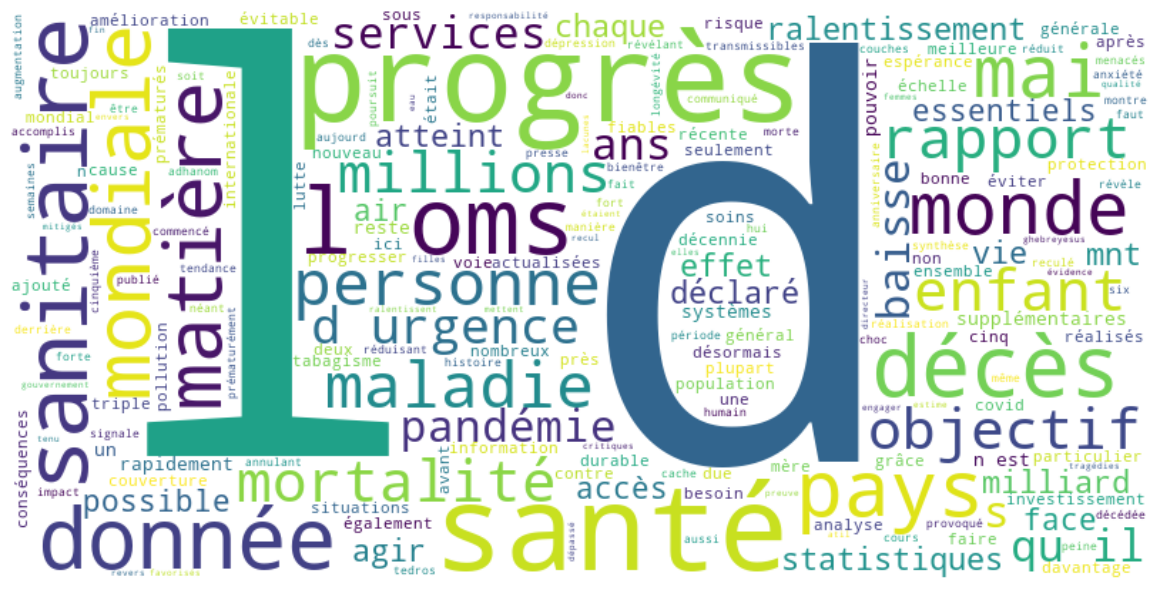

In [31]:

# 5.5 Génération du nuage de mots (WordCloud)

# On reconstitue un texte à partir des tokens filtrés
text_for_wc = " ".join(clean_tokens)

%matplotlib inline

wc = WordCloud(
    width=800,
    height=400,
    background_color="white"
).generate(text_for_wc)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
wc.to_file("wordcloud_oms.png")


### 5.6 Analyse du nuage de mots

Le nuage de mots met en évidence les termes les plus fréquents de l'article de l'OMS. 
On observe notamment la présence de mots liés à la santé mondiale et aux indicateurs sanitaires 
(par exemple : *sante, *progres*, *deces*, *sanitaire*, *oms*, etc.).

Cela confirme que l'article traite principalement du ralentissement des progrès en matière de santé au niveau mondial et des inégalités persistantes entre les régions. Cette analyse textuelle complète donc l'exploration de notre jeu de données de statistiques de santé globale.
